In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (with header)
df = pd.read_csv('../mpi_weak_scaling/mpi_times.csv')

# Show the dataframe
df

,node,MPI_task,Thread,Comm,min,max,avg,sizex,sizey
0,1,7,16,0.104613,0.093338,0.127909,0.101317,1000,1000
1,2,7,16,0.102092,0.114486,0.125550,0.116589,2000,1000
2,4,7,16,0.253271,0.100248,0.123104,0.103102,4000,1000
3,8,7,16,0.428905,0.096991,0.185077,0.104477,8000,1000


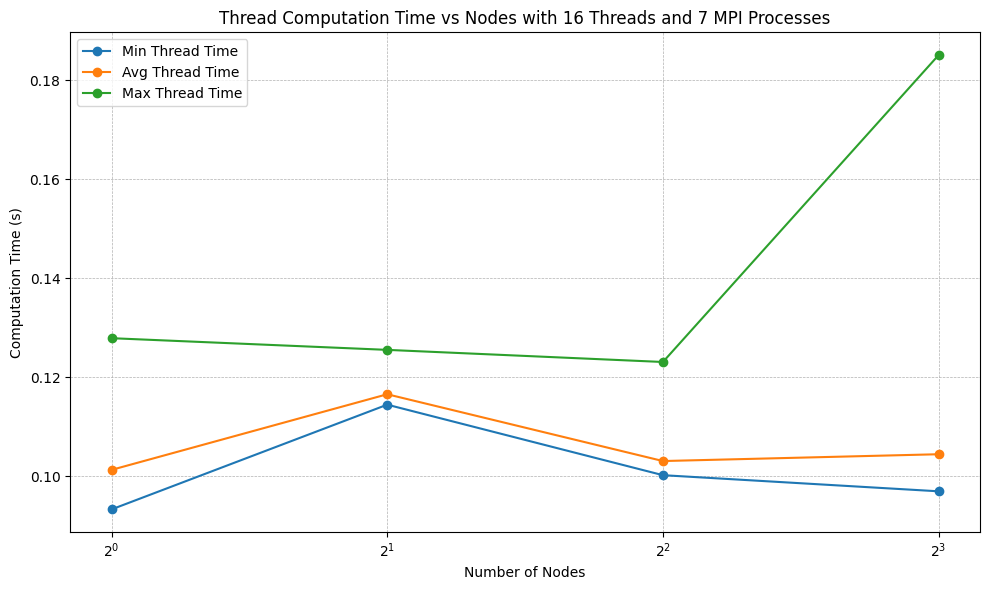

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['min'], marker='o', label='Min Thread Time')
plt.plot(df['node'], df['avg'], marker='o', label='Avg Thread Time')
plt.plot(df['node'], df['max'], marker='o', label='Max Thread Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Computation Time (s)')
plt.title('Thread Computation Time vs Nodes with 16 Threads and 7 MPI Processes')
# Set x-axis to logarithmic scale and show all axis
plt.xticks(df['node'], labels=df['node'])
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

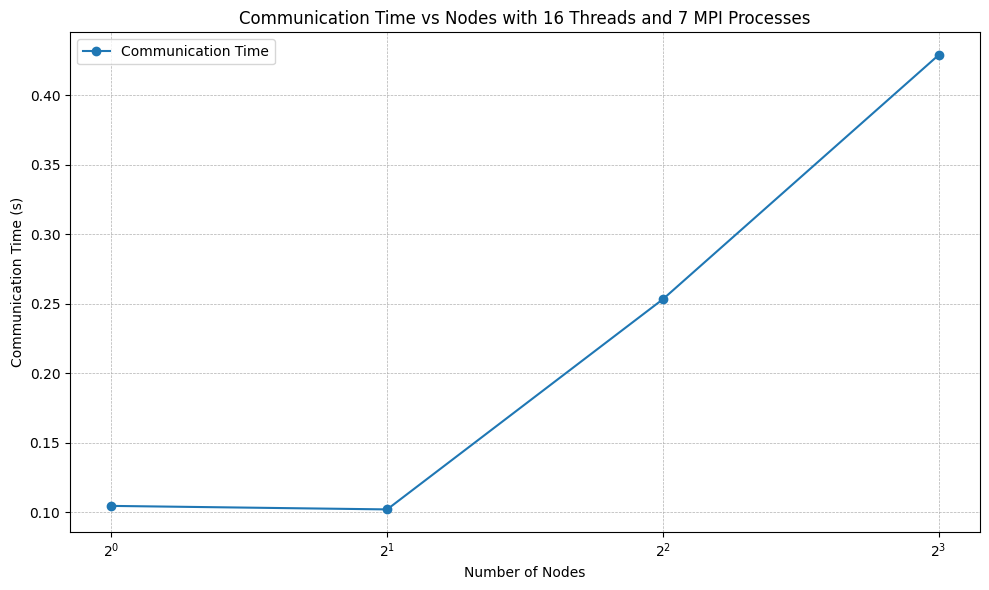

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['Comm'], marker='o', label='Communication Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Communication Time (s)')
plt.title('Communication Time vs Nodes with 16 Threads and 7 MPI Processes')
# Set x-axis to logarithmic scale and show all axis
plt.xticks(df['node'], labels=df['node'])
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Use avg time for speedup/efficiency
base_time = df['avg'].iloc[0] 
df['Speedup'] = base_time / df['avg']

T1 = df['min'].iloc[0]
df['Efficiency'] = T1 / df['min']
df

,node,MPI_task,Thread,Comm,min,max,avg,sizex,sizey,Speedup,Efficiency
0,1,7,16,0.104613,0.093338,0.127909,0.101317,1000,1000,1.000000,1.000000
1,2,7,16,0.102092,0.114486,0.125550,0.116589,2000,1000,0.869010,0.815279
2,4,7,16,0.253271,0.100248,0.123104,0.103102,4000,1000,0.982687,0.931071
3,8,7,16,0.428905,0.096991,0.185077,0.104477,8000,1000,0.969754,0.962337


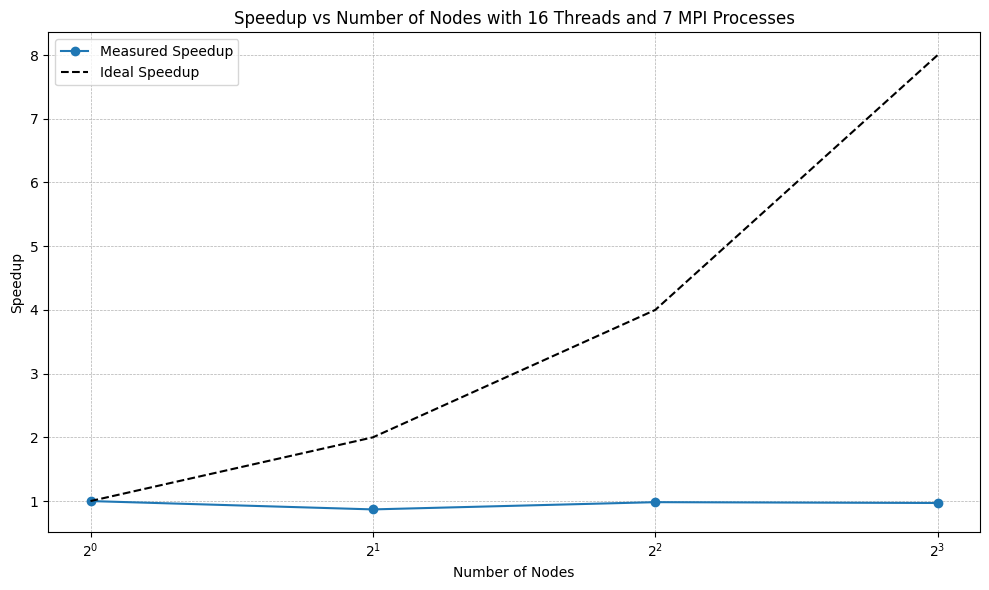

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['Speedup'], marker='o', label='Measured Speedup')
plt.plot(df['node'], df['node'], 'k--', label='Ideal Speedup')  # Ideal: speedup = threads
plt.xlabel('Number of Nodes')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Nodes with 16 Threads and 7 MPI Processes')
plt.xscale('log', base=2)
plt.xticks(df['node'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

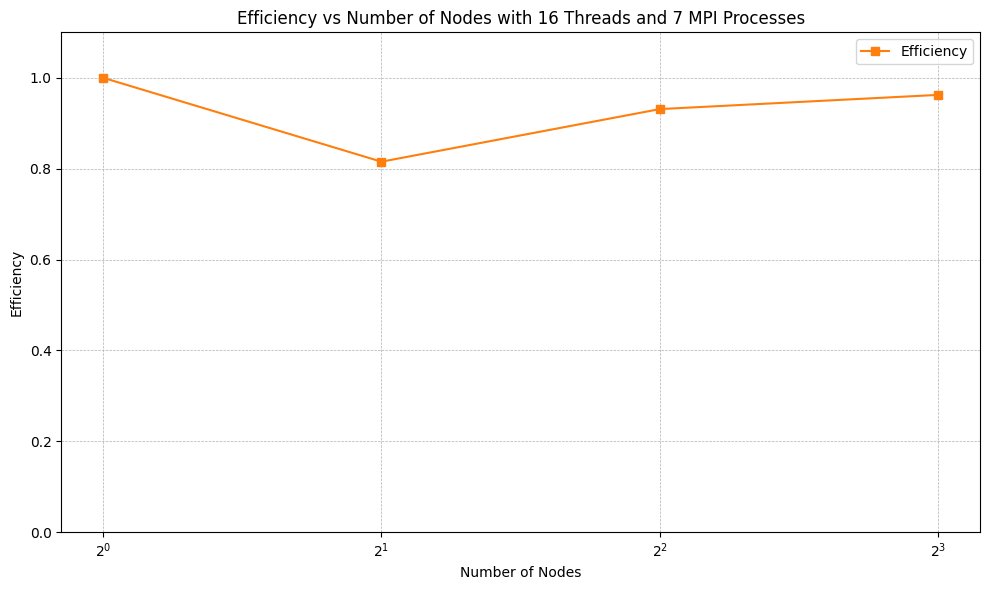

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['Efficiency'], marker='s', color='tab:orange', label='Efficiency')
plt.xlabel('Number of Nodes')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Nodes with 16 Threads and 7 MPI Processes')
plt.xscale('log', base=2)
plt.xticks(df['node'])
plt.ylim(0, 1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()